In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import MultiTaskLassoCV
from sklearn.linear_model import Ridge
import seaborn as sns
from scipy.stats import norm
from scipy import stats
from pandas import DataFrame
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv('..\Initial_data\K5P13\K5P13_cor.csv', ";")
df

,K0P125.PV,K5Q2_2.PV,K5FCV4_2I.PV,K5P6.PV,K5PCV6I.PV,K5PCV17_1I.PV,K5P17_1.PV,K5PCV17_2I.PV,K5P17_2.PV,K5F3.PV,...,K5T12.PV,K5P13.PV,K5HCV60I.PV,K5P16_1.PV,K5GKAL.PV,K5HCV61I.PV,K5P16_2.PV,K5FCV4_1I.PV,K5Q2_1.PV,K5P4_1.PV
0,65.06800,306.4375,3.578125,0.900526,98.01218,80.30844,6.307891,99.49062,6.050391,2159.500,...,146.0056,3.962700,97.84406,0.591758,15.72144,97.49750,0.672008,100.0,1118.125,12.03594
1,65.32150,555.0000,3.650312,0.899542,98.01718,80.36750,6.339375,99.49469,6.072500,2163.702,...,146.0044,3.965325,97.89719,0.589313,15.72836,97.48750,0.671820,100.0,1112.781,12.07938
2,65.41600,534.7188,3.488750,0.901530,98.02969,80.35875,6.351094,99.50313,6.092891,2165.970,...,146.0350,3.963337,97.93125,0.582937,15.70855,97.56750,0.663297,100.0,1118.156,12.12500
3,65.03550,521.5625,3.468125,0.900132,98.03313,80.35593,6.320000,99.49500,6.067657,2158.601,...,146.0437,3.965475,97.87218,0.602055,15.82219,97.50125,0.671211,100.0,1118.469,12.04438
4,64.61700,369.8125,3.480000,0.898715,98.01531,80.39063,6.260078,99.50188,6.017812,2150.234,...,145.9856,3.965212,97.93031,0.600578,15.77796,97.65594,0.665750,100.0,1117.750,11.95125
5,64.35200,536.7813,3.666875,0.898577,98.03875,80.37937,6.228906,99.50250,5.976016,2145.338,...,146.0006,3.962344,97.95469,0.610031,15.80718,97.49156,0.666734,100.0,1109.563,11.89437
6,64.11900,553.2813,3.618125,0.901136,98.00719,80.39188,6.208047,99.50250,5.953281,2140.747,...,146.0156,3.965044,98.00468,0.610187,15.80968,97.46250,0.671484,100.0,1115.938,11.85500
7,64.07850,541.3438,3.572187,0.898183,98.01094,80.34500,6.200781,99.49531,5.941719,2138.958,...,146.0137,3.963356,97.89188,0.559531,15.80663,97.54125,0.673258,100.0,1115.000,11.83656
8,64.52750,516.6875,3.489687,0.900034,98.03812,80.30282,6.246172,99.50719,5.977188,2148.246,...,146.0244,3.959981,97.87344,0.592891,15.81710,97.54968,0.659078,100.0,1121.875,11.92125
9,64.89000,460.6875,3.457188,0.902436,98.03375,80.30938,6.287109,99.51031,6.037344,2156.099,...,146.0063,3.962775,97.95594,0.576711,15.82742,97.63406,0.670234,100.0,1118.156,11.98219


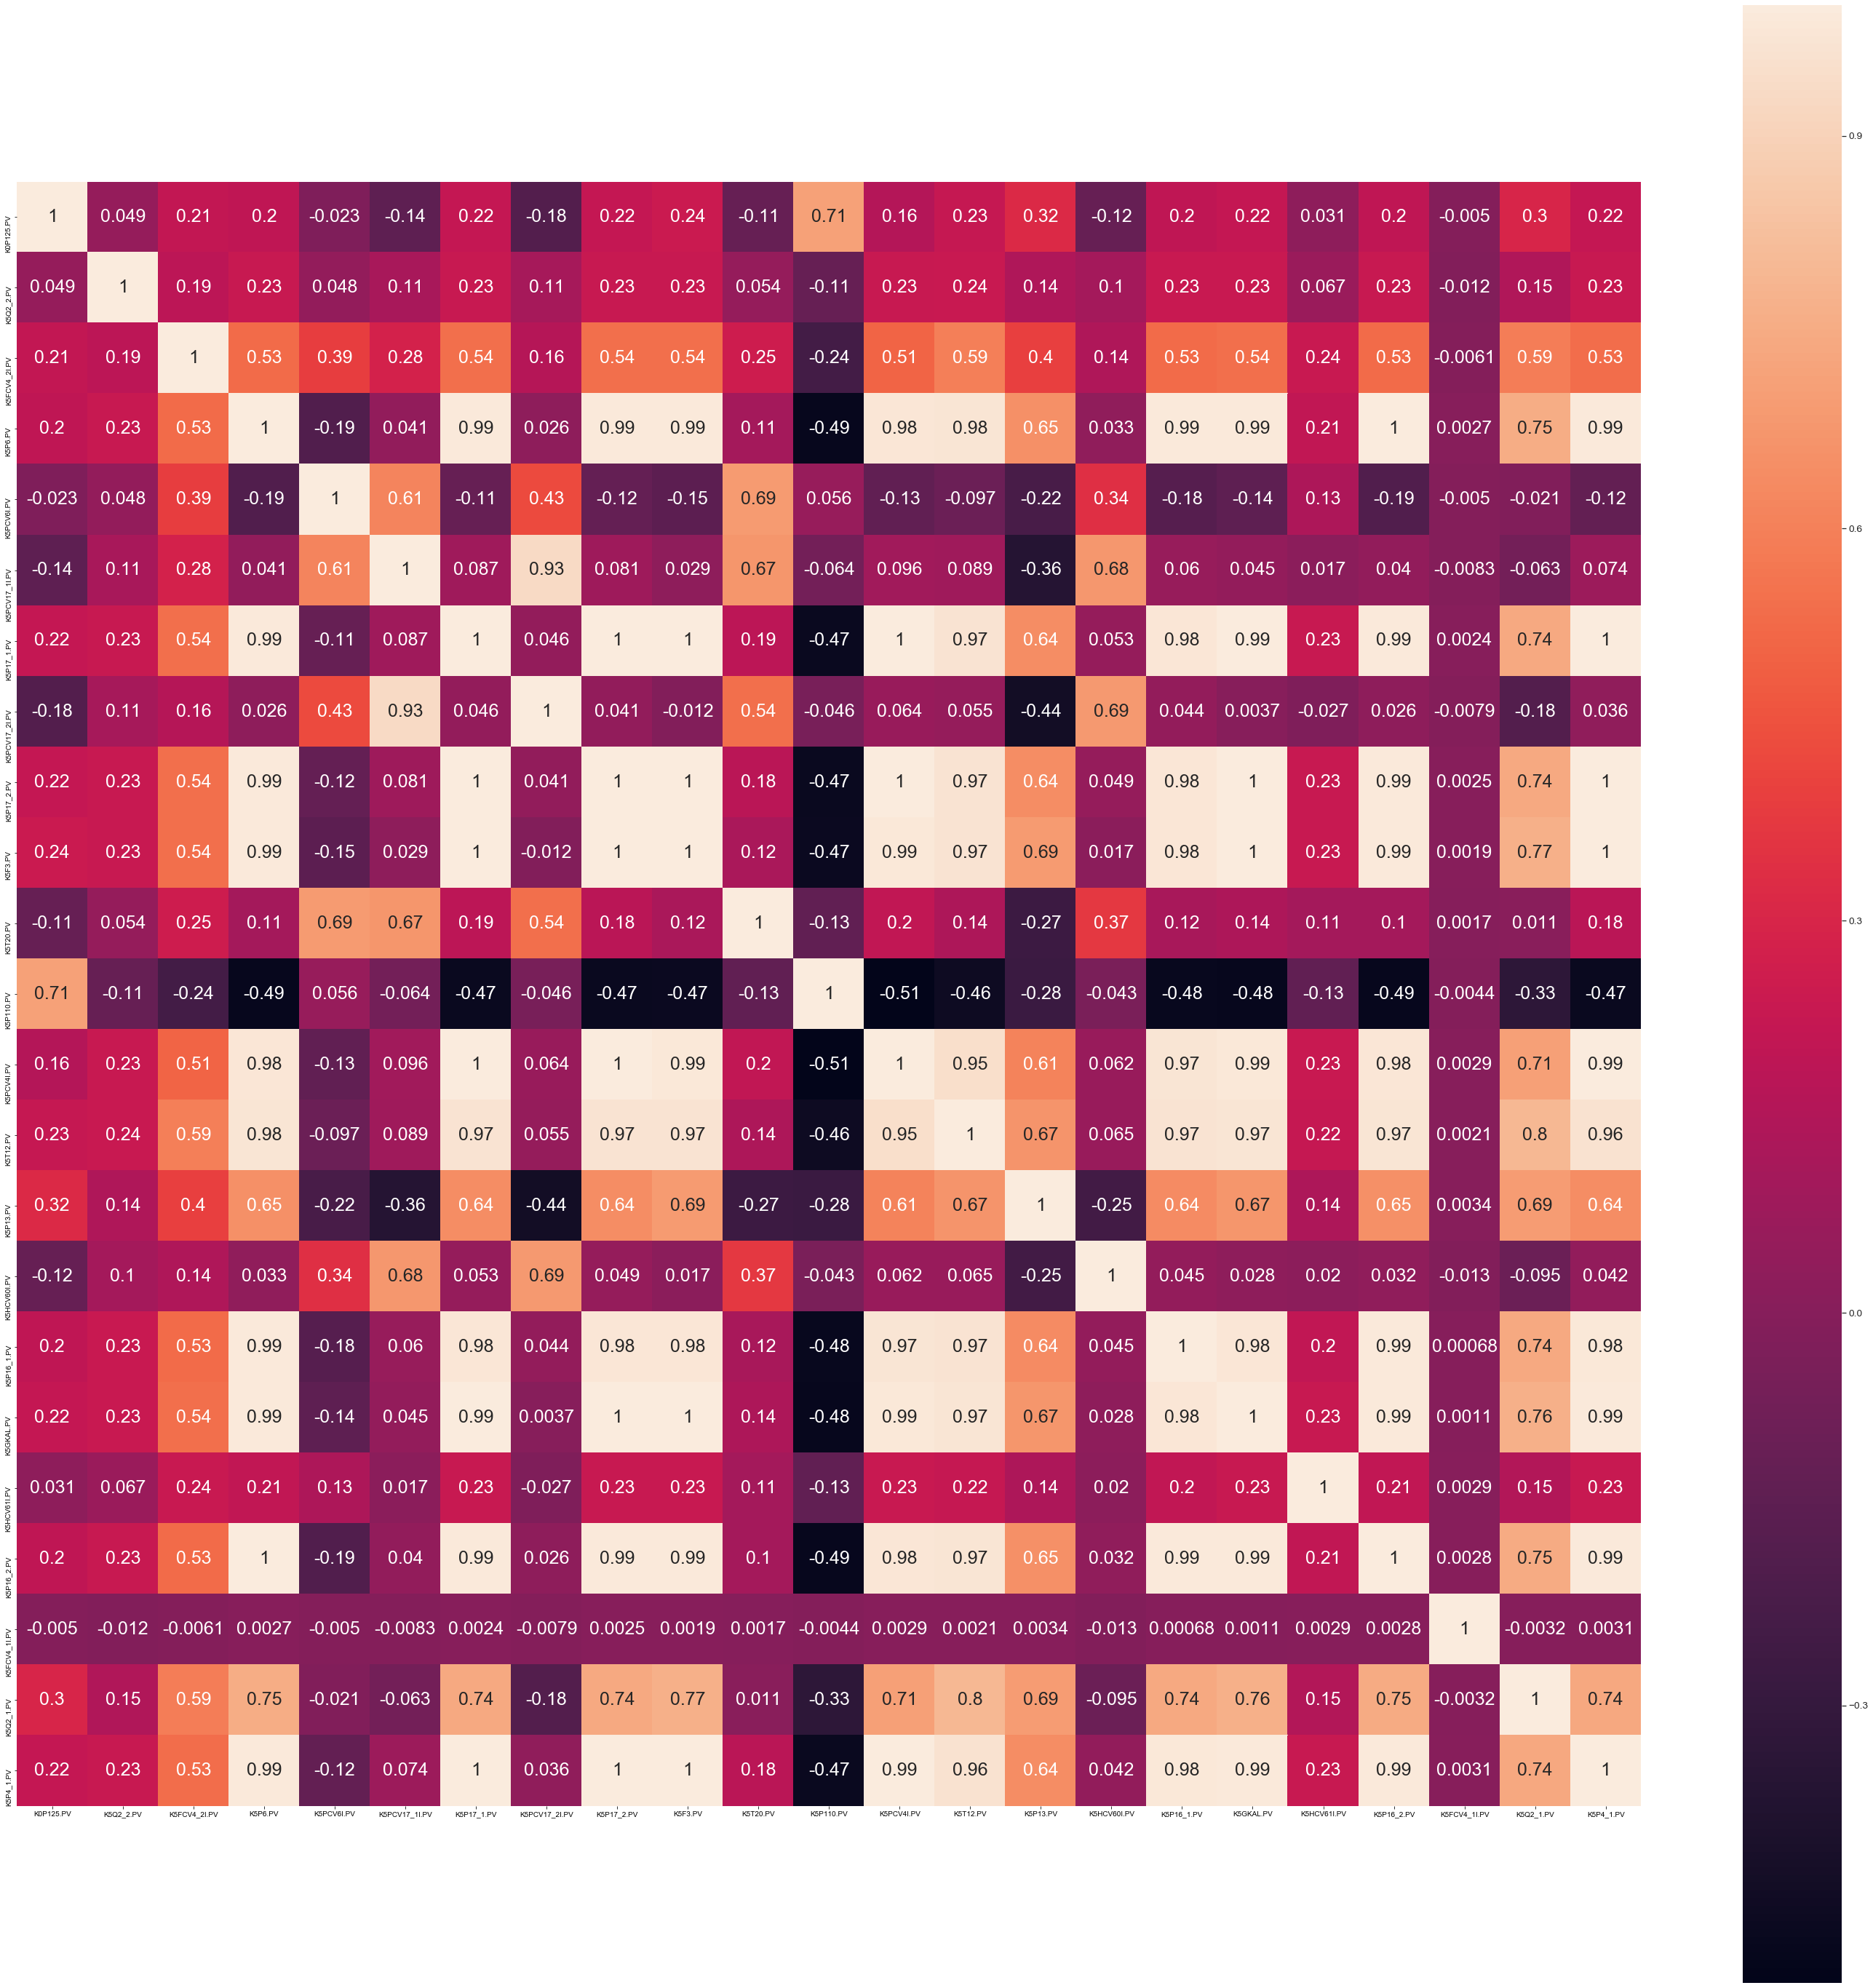

In [3]:
corrmat = df.corr()
fig,ax = plt.subplots(figsize=(50,50))
sns.set(font_scale=1.25)
sns.heatmap(corrmat, annot=True, annot_kws={'size':25}, square=True)

In [9]:
df = pd.read_csv('..\Initial_data\K5P13\K5P13.csv', ";")
df

,K5P6.PV,K5P17_1.PV,K5P17_2.PV,K5F3.PV,K5PCV4I.PV,K5T12.PV,K5P13.PV,K5P16_1.PV,K5GKAL.PV,K5P16_2.PV,K5Q2_1.PV,K5P4_1.PV
0,1.500175,9.530596,9.303347,2804.816,38.08671,167.9433,4.073233,1.015738,19.84652,1.126549,484.0471,17.993440
1,1.418568,9.114283,8.892303,2730.778,37.11661,166.2809,4.072107,0.956573,19.31243,1.065566,463.9162,17.135150
2,1.478407,9.554727,9.327216,2809.635,38.14972,167.2295,4.071414,1.000311,19.89875,1.110009,486.2339,17.982400
3,1.680137,10.316650,10.095040,2927.134,39.77588,171.2062,4.067364,1.139070,20.65832,1.260067,533.2946,19.499680
4,1.653008,10.317210,10.096680,2977.827,39.37015,169.4834,4.064949,1.117330,21.16503,1.242958,519.8514,19.379610
5,1.128559,7.629625,7.421859,2483.960,33.60369,160.0831,4.052347,0.750915,17.69941,0.847992,450.4926,14.244000
6,1.150136,7.514053,7.300005,2459.861,33.51980,159.5497,4.050002,0.763932,17.47862,0.864948,434.7739,14.001490
7,1.150148,7.506742,7.293717,2456.490,33.43434,159.6259,4.048803,0.763878,17.45961,0.864504,453.4651,13.999180
8,1.109164,7.244389,7.035130,2410.625,32.72691,158.6675,4.048123,0.735589,17.14641,0.834178,426.9359,13.592860
9,1.680142,10.282540,10.056530,2890.979,39.66401,172.1443,4.047513,1.150330,20.36385,1.259224,1775.5870,19.495560


In [10]:
df=df.dropna()
df=df.round(5)
df=df.drop_duplicates(["K5P13.PV"])
df

,K5P6.PV,K5P17_1.PV,K5P17_2.PV,K5F3.PV,K5PCV4I.PV,K5T12.PV,K5P13.PV,K5P16_1.PV,K5GKAL.PV,K5P16_2.PV,K5Q2_1.PV,K5P4_1.PV
0,1.50018,9.53060,9.30335,2804.816,38.08671,167.9433,4.07323,1.01574,19.84652,1.12655,484.0471,17.99344
1,1.41857,9.11428,8.89230,2730.778,37.11661,166.2809,4.07211,0.95657,19.31243,1.06557,463.9162,17.13515
2,1.47841,9.55473,9.32722,2809.635,38.14972,167.2295,4.07141,1.00031,19.89875,1.11001,486.2339,17.98240
3,1.68014,10.31665,10.09504,2927.134,39.77588,171.2062,4.06736,1.13907,20.65832,1.26007,533.2946,19.49968
4,1.65301,10.31721,10.09668,2977.827,39.37015,169.4834,4.06495,1.11733,21.16503,1.24296,519.8514,19.37961
5,1.12856,7.62962,7.42186,2483.960,33.60369,160.0831,4.05235,0.75092,17.69941,0.84799,450.4926,14.24400
6,1.15014,7.51405,7.30000,2459.861,33.51980,159.5497,4.05000,0.76393,17.47862,0.86495,434.7739,14.00149
7,1.15015,7.50674,7.29372,2456.490,33.43434,159.6259,4.04880,0.76388,17.45961,0.86450,453.4651,13.99918
8,1.10916,7.24439,7.03513,2410.625,32.72691,158.6675,4.04812,0.73559,17.14641,0.83418,426.9359,13.59286
9,1.68014,10.28254,10.05653,2890.979,39.66401,172.1443,4.04751,1.15033,20.36385,1.25922,1775.5870,19.49556


In [11]:
y = df.drop(['K5P6.PV','K5P17_1.PV', 'K5P17_2.PV', 'K5F3.PV', 'K5PCV4I.PV', 'K5T12.PV' ,
             'K5P16_1.PV', 'K5GKAL.PV', 'K5P16_2.PV', 'K5Q2_1.PV', 'K5P4_1.PV'], axis=1)
x = df.drop(['K5P13.PV'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state = 25)

In [14]:
lasso = MultiTaskLassoCV(cv=5, random_state=1).fit(X_train, y_train)
lasso.score(x, y)
clf = Ridge(alpha=1.5)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7884613297787182

In [15]:
import pickle
filename = '../model/K5P13.sav'
pickle.dump(clf, open(filename, 'wb'))

In [16]:
loaded_model = pickle.load(open("../model/K5P13.sav", 'rb'))

In [17]:
task2 = {'K5P6.PV':[0.62],'K5P17_1.PV':[4.65], 'K5P17_2.PV':[4.53], 'K5F3.PV':[1921.048], 'K5PCV4I.PV':[26.8], 'K5T12.PV':[140] ,
             'K5P16_1.PV':[0.38], 'K5GKAL.PV':[13.97], 'K5P16_2.PV':[0.47], 'K5Q2_1.PV':[347.63], 'K5P4_1.PV':[9.00]}
df2 = pd.DataFrame(data=task2)
df2

,K5P6.PV,K5P17_1.PV,K5P17_2.PV,K5F3.PV,K5PCV4I.PV,K5T12.PV,K5P16_1.PV,K5GKAL.PV,K5P16_2.PV,K5Q2_1.PV,K5P4_1.PV
0,0.62,4.65,4.53,1921.048,26.8,140,0.38,13.97,0.47,347.63,9.0


In [18]:
loaded_model.predict(df2)

array([[3.98337018]])